# REGRESION LOGISTICA 

In [13]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot as plt

# Modulo de optimización de scipy
from scipy import optimize

import pandas as pd

import seaborn as sns

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# Correciones en el dataset

Realizamos el reemplazo de ciertos valores que se nos otorga en strings por ejemplo "gender" que arroja valores F para mujeres y M para hombres
una vez realizadas las correciones generamos un nuevo archivo "smoking_corregido.csv".

# NO CORRER ESTA SECCION PARA EVITAR ERRORES

In [14]:

data = pd.read_csv('smoking.csv')

# reemplazamos valores de Y y N por 1 y 0 respectivamente y F y M por 1 y 0 respectivamente
data['oral'] = data['oral'].replace('Y', 1)
data['oral'] = data['oral'].replace('N', 0)
data['tartar'] = data['tartar'].replace('Y', 1)
data['tartar'] = data['tartar'].replace('N', 0)
data['gender'] = data['gender'].replace('F', 1)
data['gender'] = data['gender'].replace('M', 0)

# genera un archivo con los datos procesados
data.to_csv('smoking_corregido.csv', index=False)



C:\Users\luigi\AppData\Local\Temp\ipykernel_15520\71019949.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['oral'] = data['oral'].replace('Y', 1)
C:\Users\luigi\AppData\Local\Temp\ipykernel_15520\71019949.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['tartar'] = data['tartar'].replace('N', 0)
C:\Users\luigi\AppData\Local\Temp\ipykernel_15520\71019949.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.i

# Realizamos la importacion y formateo de los datos

In [15]:

data = pd.read_csv('smoking_corregido.csv')

# el formato de los datos es el siguiente:
# gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking

# separamos los datos en dos conjuntos, uno para entrenamiento y otro para prueba el 80% de los datos se usaran para entrenamiento y el 20% para prueba
train_data = data.sample(frac=0.8, random_state=200)
test_data = data.drop(train_data.index)

# separamos los datos de entrenamiento en caracteristicas y etiquetas
train_features = train_data.copy()

# quitamos la columna de id de los datos de entrenamiento y prueba
train_features = train_features.drop('ID', axis=1)

X = train_features.drop('smoking', axis=1)
X = train_features.drop('oral', axis=1)
Y = train_features['smoking']

X.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
47437,0,40,165,80,92.0,0.7,0.6,1.0,1.0,127.0,...,105.0,13.7,1.0,1.1,22.0,23.0,61.0,0,1,1
36622,0,20,170,70,77.0,1.6,1.6,1.0,1.0,117.0,...,134.0,15.0,1.0,1.1,25.0,20.0,34.0,0,1,1
11510,1,40,155,65,80.5,1.2,0.4,1.0,1.0,111.0,...,130.0,12.7,1.0,0.9,20.0,22.0,11.0,0,0,0
39947,0,65,155,65,88.0,0.9,0.9,1.0,1.0,135.0,...,147.0,17.0,1.0,1.1,27.0,24.0,51.0,0,1,0
50862,0,20,175,70,75.2,1.2,1.5,1.0,1.0,130.0,...,156.0,16.6,1.0,1.3,22.0,19.0,19.0,0,1,0


In [16]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [17]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [18]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

Media calculada: gender                   0.362998
age                     44.174709
height(cm)             164.682857
weight(kg)              65.889258
waist(cm)               82.049297
eyesight(left)           1.013734
eyesight(right)          1.006956
hearing(left)            1.025632
hearing(right)           1.026036
systolic               121.492638
relaxation              75.989922
fasting blood sugar     99.303340
Cholesterol            196.971787
triglyceride           126.748014
HDL                     57.278494
LDL                    115.073461
hemoglobin              14.624141
Urine protein            1.085739
serum creatinine         0.886562
AST                     26.105086
ALT                     26.982089
Gtp                     39.882839
dental caries            0.213786
tartar                   0.555842
smoking                  0.368407
dtype: float64
Desviación estandar calculada: gender                  0.480864
age                    12.072519
height(cm)           


# Función de Costo y Gradiente

In [19]:

# agregamos una columna de unos a X

m, n = X.shape

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

X


array([[ 1.        , -0.75488613, -0.34580269, ..., -0.52145714,
         0.89390786,  1.30934722],
       [ 1.        , -0.75488613, -2.00245784, ..., -0.52145714,
         0.89390786,  1.30934722],
       [ 1.        ,  1.3247031 , -0.34580269, ..., -0.52145714,
        -1.11868352, -0.76373935],
       ...,
       [ 1.        ,  1.3247031 ,  0.48252489, ...,  1.91770313,
         0.89390786, -0.76373935],
       [ 1.        ,  1.3247031 ,  0.48252489, ..., -0.52145714,
         0.89390786, -0.76373935],
       [ 1.        ,  1.3247031 ,  0.0683611 , ..., -0.52145714,
        -1.11868352, -0.76373935]])

In [20]:
# Usando regularización
def calcularCosto(theta, X, y, lambda_ ):
    # Inicializar algunos valores utiles
    m = y.size  

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))+ (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return J

In [21]:
def descensoGradientess(theta, X, y, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] 

    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        #CON REGULARIZACION
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        theta[1:] += (lambda_ / m) * theta[1:]

        J_history.append(calcularCosto(theta, X, y, lambda_))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 3.68406877e-01  1.22489711e-04  9.59887339e-07 -2.88118876e-05
  2.18940808e-05 -2.65958080e-06  1.78161152e-06  1.83812814e-06
  4.11667172e-06 -3.66033035e-08  1.94112248e-05 -1.02531447e-05
 -7.88495752e-06  6.55892407e-06 -3.81649335e-05 -2.78225375e-06
  3.19151725e-06 -2.17516448e-05 -4.24972676e-07  1.40450853e-05
  7.34670991e-06  5.92542494e-06 -3.31536162e-05 -1.47049193e-05
 -1.74662357e-05  4.82682696e-01]
con un costo de: 2.9500551918015543e-07 


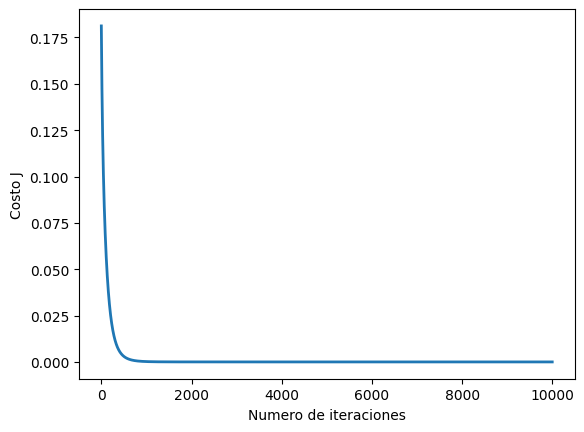

In [22]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.005
num_iters = 10000
lambda_= 0.1

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(26)
theta, J_historico = descensoGradientess(theta, X, Y, alpha, num_iters, lambda_)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_historico)), J_historico, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

print(f"con un costo de: { J_historico[-1]} ")


# Realizamos el testeo

In [23]:
# realizamos el testeo
# separamos los datos de prueba en caracteristicas y etiquetas

test_features = test_data.copy()
test_features = test_features.drop('ID', axis=1)
X_test = test_features.drop('smoking', axis=1)
X_test = test_features.drop('oral', axis=1)
Y_test = test_features['smoking']
print(len(X_test))

# normalizamos los datos de prueba
X_test = (X_test - mu) / sigma

# agregamos una columna de unos a X
m, n = X_test.shape
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)

Y_pred = []
for i in range(len(X_test)):
    Y_pred.append(sigmoid(X_test[i].dot(theta.T)))

Y_pred = np.array(Y_pred)


for i in range(len(Y_pred)):
    print(f"Valor real: {Y_test.iloc[i]} Valor predicho: {Y_pred[i]}")




11138
Valor real: 1 Valor predicho: 0.7311195906190192
Valor real: 0 Valor predicho: 0.4999101338456334
Valor real: 0 Valor predicho: 0.5000048623316315
Valor real: 0 Valor predicho: 0.4999016536858546
Valor real: 1 Valor predicho: 0.7310982414096355
Valor real: 1 Valor predicho: 0.7311178838144194
Valor real: 0 Valor predicho: 0.49989802954421897
Valor real: 1 Valor predicho: 0.7311260601184016
Valor real: 0 Valor predicho: 0.4999958299993296
Valor real: 1 Valor predicho: 0.7311202426783668
Valor real: 0 Valor predicho: 0.4999338617465642
Valor real: 1 Valor predicho: 0.7311187502131851
Valor real: 0 Valor predicho: 0.49991738158385224
Valor real: 1 Valor predicho: 0.7311564831102754
Valor real: 0 Valor predicho: 0.4999925052562428
Valor real: 1 Valor predicho: 0.7311281614468552
Valor real: 1 Valor predicho: 0.7311231933666437
Valor real: 0 Valor predicho: 0.49993508973338024
Valor real: 1 Valor predicho: 0.7311174068269091
Valor real: 0 Valor predicho: 0.4999872698203381
Valor real:

Ahora lo mostramos con las y predichas redondeadas a 1 o 0


In [24]:
# umbral para clasificar los valores
umbral = 0.5

# convertimos los valores predichos a 1 si es mayor al umbral y 0 si es menor
Y_pred = (Y_pred >= umbral).astype(int)

for i in range(len(Y_pred)):
    print(f"Valor real: {Y_test.iloc[i]} Valor predicho: {Y_pred[i]}")

Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 0 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 1
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 0 Valor predicho: 0
Valor real: 1 Valor predicho: 1
Valor real: 1 Valor predicho: 1
Valor real: 1 Valor predicho: 1
Valor re

In [25]:
# calculamos la precisión del modelo
precision = np.mean(Y_pred == Y_test) * 100
print(f'La precisión del modelo es del {precision}%')

La precisión del modelo es del 89.46848626324295%


# Para este caso se obtuvo un peor resultado con una diferencia de 11% y se observa un mayor tiempo de entrenamiento